# Face Recognition using CNN

#Import Libraries

In [1]:
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import zipfile
import os
import numpy as np
import pickle


#Add Dataset

In [2]:
drive.mount('/content/drive')
training_data_path = '/content/drive/MyDrive/data'

KeyboardInterrupt: 

#Heif to jpeg


In [3]:
# Install pillow-heif to handle HEIC files
!pip install pillow-heif

# Convert all HEIC to JPG
from PIL import Image
from pillow_heif import register_heif_opener
import os

register_heif_opener()  # Enable HEIC support

converted = 0
for root, dirs, files in os.walk(training_data_path):
    for file in files:
        if file.lower().endswith('.heic'):
            heic_path = os.path.join(root, file)
            jpg_path = heic_path.rsplit('.', 1)[0] + '.jpg'

            try:
                img = Image.open(heic_path)
                img.convert('RGB').save(jpg_path, 'JPEG')
                os.remove(heic_path)  # Delete original HEIC
                converted += 1
                print(f"Converted: {file}")
            except Exception as e:
                print(f"Failed: {file} - {e}")

print(f"\nTotal converted: {converted} HEIC files")


Total converted: 0 HEIC files


#Preparing Image
 64x64 pixels from 0-255 to 0-1

In [4]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

training_set = datagen.flow_from_directory(
    training_data_path,
    target_size=(64, 64),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

validation_set = datagen.flow_from_directory(
    training_data_path,
    target_size=(64, 64),
    batch_size=128,
    class_mode='categorical',
    subset='validation'
)

print()
print(f"Total number of classes: {len(training_set.class_indices)}")
print(f"Training images: {training_set.samples}")
print(f"Validation images: {validation_set.samples}")

Found 1293 images belonging to 91 classes.
Found 308 images belonging to 91 classes.

Total number of classes: 91
Training images: 1293
Validation images: 308


In [5]:
#mapping of person name to number
results_map = {v: k for k, v in training_set.class_indices.items()}


#print(dict(list(training_set.class_indices.items())))

with open('results_map.pkl', 'wb') as f:
    pickle.dump(results_map, f)

print(f"\nTotal number of output classes: {len(results_map)}")
print("Person mapping saved successfully!")


Total number of output classes: 91
Person mapping saved successfully!


Architecture:

Convolutional Layer: Detects patterns in images

Pooling Layer: Reduces image size while keeping important features

Flatten Layer: Converts 2D image data to 1D array

Dense Layer: Learns combinations of features

Output Layer: Predicts which person

In [3]:
num_classes = 91

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
# - optimizer: Adam (efficient training algorithm)
# - loss: categorical crossentropy (for multi-class classification)
# - metrics: accuracy (track how well model is doing)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model created successfully!\n")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model created successfully!



In [10]:
num_classes = 91
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax', dtype='float32')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    training_set,
    epochs=15,
    validation_data=validation_set,
)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 553s 58s/step - accuracy: 0.0433 - loss: 5.0881 - val_accuracy: 0.1172 - val_loss: 4.2796
Epoch 2/15
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0547 - loss: 4.4344

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 3s/step - accuracy: 0.0547 - loss: 4.4344 - val_accuracy: 0.1250 - val_loss: 4.2573
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 95s 9s/step - accuracy: 0.1434 - loss: 4.1225 - val_accuracy: 0.2148 - val_loss: 3.8412
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.2656 - loss: 3.6194 - val_accuracy: 0.2383 - val_loss: 3.7853
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 95s 9s/step - accuracy: 0.2189 - loss: 3.5172 - val_accuracy: 0.2383 - val_loss: 3.2916
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2031 - loss: 3.2150 - val_accuracy: 0.2578 - val_loss: 3.2450
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 14s/step - accuracy: 0.3474 - loss: 2.9669 - val_accuracy: 0.3398 - val_loss: 2.9121
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4375 - loss: 2.5899 - val_accuracy: 0.4141 - val_loss: 2.7930
Epoch 9/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 93s 9s/step - accuracy: 0.5516 - loss: 2.2737 - val_accuracy: 0.4219 - val_loss: 2.5522
E

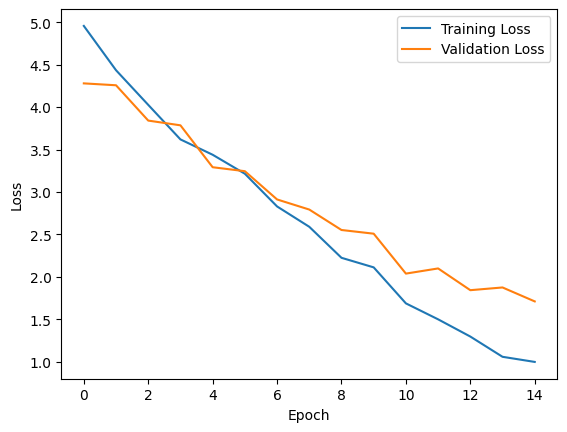

In [15]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Save Model


In [16]:
model.save('face_recognition_model.keras')
print("saved as 'face_recognition_model.keras'")

model.save('face_recognition_model.h5')
print("saved as 'face_recognition_model.h5'")

saved as 'face_recognition_model.keras'
saved as 'face_recognition_model.h5'
